# Magic: The Gathering (анализ карт)

<div class="alert alert-block alert-info">
Дан датафрейм с данными по картам, используемым в игре Magic: The Gathering. Необходимо ответить на следующие вопросы:  
1. Определить распределение карт по цвету в зависимости от редкости.  
2. Найти процент карт, запрещенных в формате Commander, а также распределение по типу для этих карт.  
3. Составить топ-10 карт, не являющихся землями, которые были напечатаны в наибольшем количестве сетов.  
4. Для карт, не являющихся землями, определить, какая часть из них даёт ману с помощью своего эффекта. Показать распределение по типу маны, которую дают эти карты.  

In [1]:
# загрузка библиотек
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
import warnings
warnings.filterwarnings('ignore')

In [2]:
# открытие файла
df = pd.read_csv('../input/mtg-all-cards/all_mtg_cards.csv')

In [3]:
# функция для изучения данных
def open_info(data):
    # вывод 5 строк данных
    print('*******************************************************')
    print('Представление датафрейма')
    display(data.head())
    print('*******************************************************')
    # вывод информации о датафрейме
    print('Общая информация о датафрейме')
    print('')
    print(data.info())
    print('*******************************************************')
    # проверка на наличие дубликатов
    print('Дубликаты:', data.duplicated().sum())
    print('*******************************************************')
    # проверка на наличие пропусков
    print('Пропуски:', data.isnull().sum())

In [4]:
open_info(df)

*******************************************************
Представление датафрейма


,name,multiverse_id,layout,names,mana_cost,cmc,colors,color_identity,type,supertypes,...,foreign_names,printings,original_text,original_type,legalities,source,image_url,set,set_name,id
0,Ancestor's Chosen,130550.0,normal,NaN,{5}{W}{W},7.0,['White'],['W'],Creature — Human Cleric,NaN,...,"[{'name': 'Ausgewählter der Ahnfrau', 'text': ...","['10E', 'JUD', 'UMA']",First strike (This creature deals combat damag...,Creature - Human Cleric,"[{'format': 'Commander', 'legality': 'Legal'},...",NaN,http://gatherer.wizards.com/Handlers/Image.ash...,10E,Tenth Edition,5f8287b1-5bb6-5f4c-ad17-316a40d5bb0c
1,Ancestor's Chosen,NaN,normal,NaN,{5}{W}{W},7.0,['White'],['W'],Creature — Human Cleric,NaN,...,NaN,"['10E', 'JUD', 'UMA']",NaN,NaN,"[{'format': 'Commander', 'legality': 'Legal'},...",NaN,NaN,10E,Tenth Edition,b7c19924-b4bf-56fc-aa73-f586e940bd42
2,Angel of Mercy,129465.0,normal,NaN,{4}{W},5.0,['White'],['W'],Creature — Angel,NaN,...,"[{'name': 'Engel der Gnade', 'text': 'Fliegend...","['10E', '8ED', '9ED', 'DDC', 'DVD', 'IMA', 'IN...",Flying (This creature can't be blocked except ...,Creature - Angel,"[{'format': 'Commander', 'legality': 'Legal'},...",NaN,http://gatherer.wizards.com/Handlers/Image.ash...,10E,Tenth Edition,57aaebc1-850c-503d-9f6e-bb8d00d8bf7c
3,Angel of Mercy,NaN,normal,NaN,{4}{W},5.0,['White'],['W'],Creature — Angel,NaN,...,NaN,"['10E', '8ED', '9ED', 'DDC', 'DVD', 'IMA', 'IN...",NaN,NaN,"[{'format': 'Commander', 'legality': 'Legal'},...",NaN,NaN,10E,Tenth Edition,8fd4e2eb-3eb4-50ea-856b-ef638fa47f8a
4,Angelic Blessing,129711.0,normal,NaN,{2}{W},3.0,['White'],['W'],Sorcery,NaN,...,"[{'name': 'Himmlischer Segen', 'text': 'Eine K...","['10E', '9ED', 'EXO', 'P02', 'POR', 'PS11', 'S...",Target creature gets +3/+3 and gains flying un...,Sorcery,"[{'format': 'Commander', 'legality': 'Legal'},...",NaN,http://gatherer.wizards.com/Handlers/Image.ash...,10E,Tenth Edition,55bd38ca-dc73-5c06-8f80-a6ddd2f44382


*******************************************************
Общая информация о датафрейме

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66770 entries, 0 to 66769
Data columns (total 39 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   name            66770 non-null  object 
 1   multiverse_id   47455 non-null  float64
 2   layout          66770 non-null  object 
 3   names           0 non-null      float64
 4   mana_cost       58100 non-null  object 
 5   cmc             66770 non-null  float64
 6   colors          52612 non-null  object 
 7   color_identity  59739 non-null  object 
 8   type            66770 non-null  object 
 9   supertypes      9912 non-null   object 
 10  subtypes        40903 non-null  object 
 11  rarity          66770 non-null  object 
 12  text            65805 non-null  object 
 13  flavor          34412 non-null  object 
 14  artist          66759 non-null  object 
 15  number          66770 non-null  ob

<div class="alert alert-success">
В датафрейме 39 столбцов и 66770 строк. В нем отражена информация о каждой выпущенной карте: цвет, тип, ее функция, сет, id и т.п. Есть пропуски в столбцах multiverse_id, names, mana_cost, colors, color_identity, supertypes и т.д. Где-то пропуски оказываются значимыми, где-то, возможно, они связаны с ошибками в выгрузке данных. В работе используются, как правило столбцы без пропусков либо столбцы, где отсуствие значения значимо. Например, color_identity, в котором отсутсвие указания на цвет можно считать знаком того, что карта бесцветна. Дубликатов нет. Есть большое количество строк, в которых информация практически совпадает, но в этих случаях различаются id и номера сетов.

## Распределение карт по цвету в зависимости от редкости.

In [5]:
# вывод количества значений столбца с цветом карт
df['colors'].value_counts()

['Green']                                     9416
['Black']                                     9167
['Red']                                       9117
['White']                                     9007
['Blue']                                      8919
['Green', 'White']                             622
['Green', 'Red']                               611
['Black', 'Blue']                              595
['Blue', 'White']                              591
['Black', 'Red']                               590
['Black', 'Green']                             564
['Green', 'Blue']                              541
['Black', 'White']                             526
['Red', 'White']                               510
['Red', 'Blue']                                507
['Black', 'Red', 'Blue']                       169
['Green', 'Red', 'White']                      137
['Black', 'Blue', 'White']                     133
['Green', 'Blue', 'White']                     133
['Black', 'Green', 'Red']      

In [6]:
# вывод количества идентификаторов цвета карт и его сортировка
df['color_identity'].value_counts().sort_values()

['B', 'G', 'R', 'U']             6
['B', 'G', 'R', 'W']             6
['B', 'R', 'U', 'W']             8
['G', 'R', 'U', 'W']            10
['B', 'G', 'U', 'W']            11
['G', 'R', 'U']                 99
['R', 'U', 'W']                108
['B', 'G', 'W']                111
['B', 'G', 'U']                125
['B', 'R', 'W']                140
['B', 'U', 'W']                171
['B', 'G', 'R']                184
['G', 'R', 'W']                185
['G', 'U', 'W']                187
['B', 'G', 'R', 'U', 'W']      214
['B', 'R', 'U']                221
['B', 'W']                     781
['R', 'U']                     792
['G', 'U']                     799
['R', 'W']                     811
['B', 'G']                     858
['U', 'W']                     893
['B', 'U']                     902
['B', 'R']                     904
['G', 'R']                     912
['G', 'W']                     939
['W']                         9685
['U']                         9709
['R']               

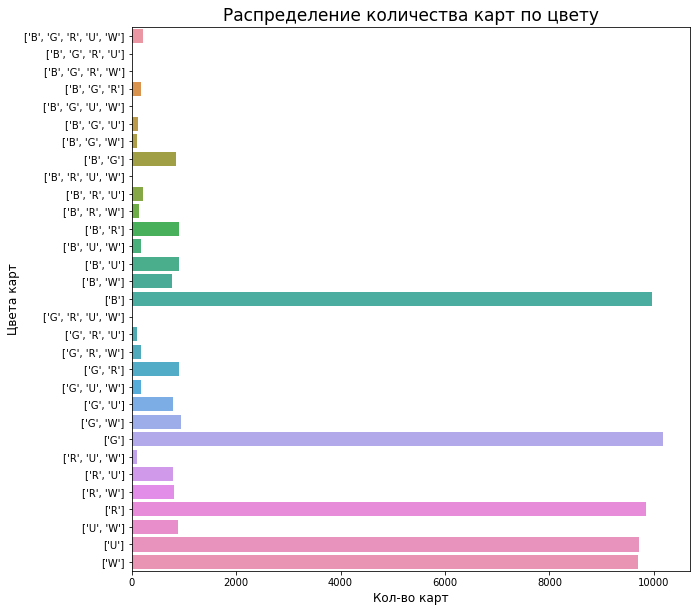

In [7]:
# сводная таблица
df_color = df.pivot_table(index = 'color_identity', values = 'name', aggfunc = ['count'])
df_color.columns = ['count']

# диаграмма
fig, ax = plt.subplots(figsize=(10, 10))
sns.barplot(data=df_color, y = df_color.index, x = 'count')
plt.xlabel('Кол-во карт', fontsize=12)
plt.ylabel('Цвета карт', fontsize=12)
plt.title('Распределение количества карт по цвету', fontsize=17);

In [8]:
# создание нового столбца с обозначениями цветов
df["color_id"] = df["color_identity"].apply(str)
df["color_id"] = df["color_id"].apply(lambda x: "[]" if x == "nan" else x)

def color_to_category(x):
    try:
        size = len(x)
        if(size == 0):
            return "colorless"
        elif(size == 1):
            return x[0]
        else:
            return "multi"
    except:
        return "colorless"

df["color_id"] = df["color_id"].apply(eval)
df["color_id"] = df["color_id"].apply(color_to_category)

# проверка
display(df.head(2))
df["color_id"].value_counts()

,name,multiverse_id,layout,names,mana_cost,cmc,colors,color_identity,type,supertypes,...,printings,original_text,original_type,legalities,source,image_url,set,set_name,id,color_id
0,Ancestor's Chosen,130550.0,normal,NaN,{5}{W}{W},7.0,['White'],['W'],Creature — Human Cleric,NaN,...,"['10E', 'JUD', 'UMA']",First strike (This creature deals combat damag...,Creature - Human Cleric,"[{'format': 'Commander', 'legality': 'Legal'},...",NaN,http://gatherer.wizards.com/Handlers/Image.ash...,10E,Tenth Edition,5f8287b1-5bb6-5f4c-ad17-316a40d5bb0c,W
1,Ancestor's Chosen,NaN,normal,NaN,{5}{W}{W},7.0,['White'],['W'],Creature — Human Cleric,NaN,...,"['10E', 'JUD', 'UMA']",NaN,NaN,"[{'format': 'Commander', 'legality': 'Legal'},...",NaN,NaN,10E,Tenth Edition,b7c19924-b4bf-56fc-aa73-f586e940bd42,W


multi        10377
G            10173
B             9954
R             9841
U             9709
W             9685
colorless     7031
Name: color_id, dtype: int64

In [9]:
# сводная таблица
color = df.pivot_table(index = 'color_id', values = 'name', aggfunc = ['count'])
color.columns = ['count']

# диаграмма
# вариант 1
fig = go.Figure(data=[go.Pie(labels=color.index.to_list(), values=color['count'].to_list())])
fig.update_layout(title="Распределение количества карт по цвету")
fig.show()

rarity,Bonus,Common,Mythic,Rare,Special,Uncommon
color_id,,,,,,
B,1.0,3981.0,534.0,2969.0,34.0,2435.0
G,1.0,4156.0,450.0,3040.0,35.0,2491.0
R,1.0,3885.0,480.0,3022.0,34.0,2419.0
U,4.0,3940.0,478.0,2914.0,37.0,2336.0
W,1.0,3782.0,511.0,2960.0,35.0,2396.0
colorless,2.0,1426.0,439.0,2907.0,30.0,2227.0
multi,NaN,1434.0,1591.0,4382.0,43.0,2927.0


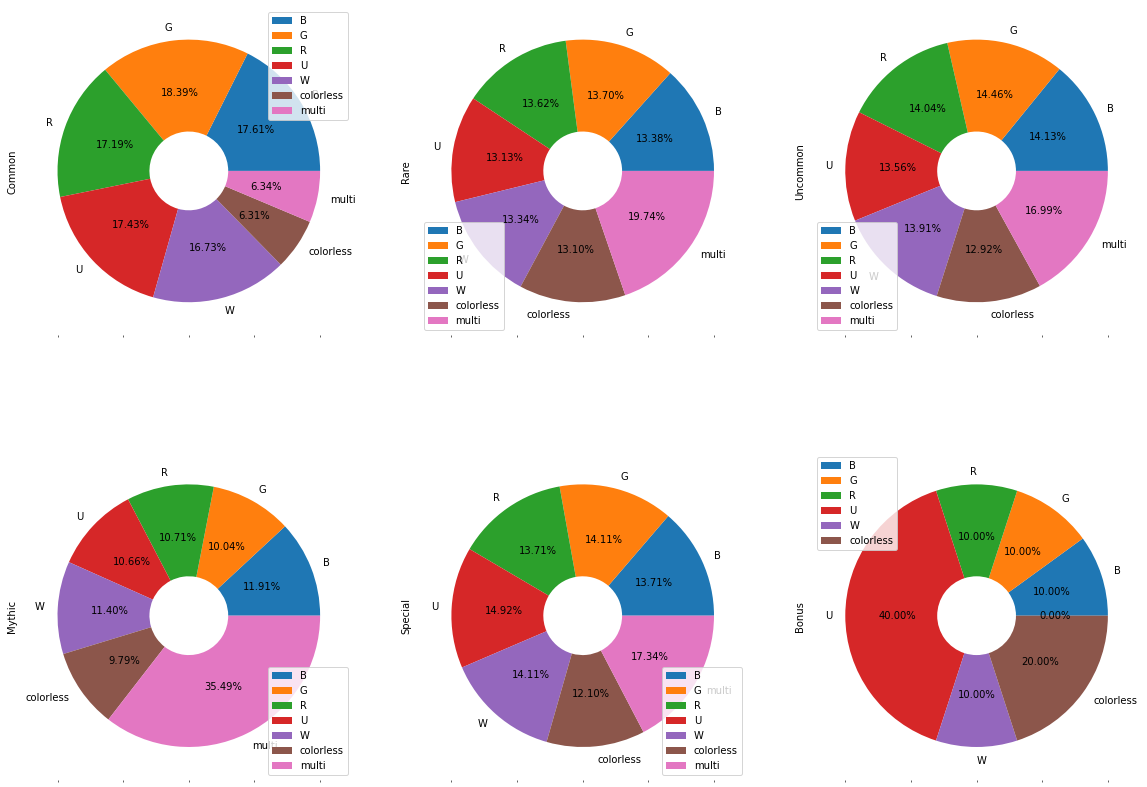

In [10]:
# распределение карт по цвету в зависимости от редкости
# сводная таблица
df_piv = df.pivot_table(index='color_id', columns='rarity',
                        values='name', aggfunc='count')

display(df_piv)

plot_rarity = df_piv.sum().sort_values(ascending=False).head(6).index

# диаграммы
df_piv.reindex(columns=plot_rarity).plot.pie(subplots=True,
                                             figsize=(20, 15),
                                             layout=(-1, 3),
                                             autopct='%.2f%%',
                                             wedgeprops=dict(width=0.7));

<div class="alert alert-success"> 
В работе были объединены карты с 2 или более цветами в разноцветную категорию multy. Карты, о которых нет информации по цвету, отнесены в группу бесцветных - colorless. Таким образом, можно отметить, что в категории Bonus нет разноцветных карт, больше всего представлено карт синего цвета - U. В категориях Special, Mythic, Uncommon и Rare больше представлено именно разноцветных карт. В категории Common больше распространены карты черного цвета - B.

## Процент карт, запрещенных в формате Commander, а также распределение по типу для этих карт.

In [11]:
# заполнение пропусков в столбце legalities
df['legalities'].fillna('не определен', inplace=True)

# функция преобразования строкового столбца в список строк
def str_to_list(cell):
    cell = ''.join(c for c in cell if c not in "'[{}]")
    cell = cell.split(', ')
    return cell

# функция, позволяющая выделить карты, запрещенные в формате Commander
def format(row):
  y = row['legalities']
  x = str_to_list(y)
  if x[0] == "format: Commander" and x[1] == "legality: Banned":
    return "Commander_ban"
  else:
    return "Other"

df['format'] = df.apply(format, axis=1)

# проверка
df['format'].value_counts()

Other            66419
Commander_ban      351
Name: format, dtype: int64

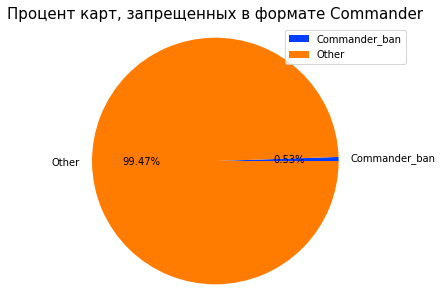

In [12]:
# сводная таблица
format_legal = df.pivot_table(index = 'format', values = 'name', aggfunc = ['count'])
format_legal.columns = ['count']
# диаграмма
palette_color = sns.color_palette('bright')
fig, ax = plt.subplots(figsize=(7, 5))
plt.pie(data=format_legal, x = 'count', labels = format_legal.index, colors = palette_color, autopct='%.2f%%')
ax.axis('equal')
ax.legend(loc='best')
plt.title('Процент карт, запрещенных в формате Commander', fontsize=15);
plt.show()

<div class="alert alert-success"> 
0.53 % от общего числа карт составляют карты, запрещенные в формате Commander.

In [13]:
# срез с картами, запрещенными в формате Commander
df_commander_ban = df.query('format == "Commander_ban"')
# распределение по типу карт
df_commander_ban['type'].value_counts()

Sorcery                                 96
Artifact                                81
Enchantment                             36
Conspiracy                              26
Instant                                 19
Legendary Land                          12
Legendary Creature — Eldrazi             9
Legendary Creature — Demon               7
Creature — Giant                         7
Creature — Human Nomad                   6
Artifact Creature — Golem                6
Legendary Creature — Elemental Otter     5
Land                                     5
Legendary Artifact                       4
Legendary Creature — Elf Advisor         4
Creature — Efreet                        4
Legendary Creature — Angel               3
Legendary Artifact Creature — Scout      3
Creature — Human Wizard                  3
Legendary Creature — Human Minion        3
Creature — Merfolk Pirate                3
Creature — Devil                         2
Legendary Creature — Elf Druid           2
Creature — 

In [14]:
# дублирование столбца
df_commander_ban['type_id'] = df_commander_ban[['type']]

# распределение карт по укрупненным группам 
df_commander_ban.loc[(df_commander_ban.type_id.str.contains('Creature')), 'type_id'] = 'Creature'
df_commander_ban.loc[(df_commander_ban.type_id.str.contains('Land')), 'type_id'] = 'Land'
df_commander_ban.loc[(df_commander_ban.type_id.str.contains('Artifact')), 'type_id'] = 'Artifact'
df_commander_ban.loc[(df_commander_ban.type_id.str.contains('Enchantment')), 'type_id'] = 'Enchantment'

# проверка
display(df_commander_ban['type_id'].value_counts())
# сводная таблица
commander_type = df_commander_ban.pivot_table(index = ['type_id', 'type'], values = 'name', aggfunc = ['count'])
commander_type.columns = ['count']
commander_type

Sorcery        96
Artifact       85
Creature       70
Enchantment    38
Conspiracy     26
Instant        19
Land           17
Name: type_id, dtype: int64

count
type_id     type                                       
Artifact    Artifact                                 81
            Legendary Artifact                        4
Conspiracy  Conspiracy                               26
Creature    Artifact Creature — Golem                 6
            Creature — Avatar                         1
            Creature — Devil                          2
            Creature — Efreet                         4
            Creature — Giant                          7
            Creature — Horror                         1
            Creature — Human Nomad                    6
            Creature — Human Wizard                   3
            Creature — Merfolk Pirate                 3
            Legendary Artifact Creature — Scout       3
            Legendary Creature — Angel                3
            Legendary Creature — Demon                7
            Legendary Creature — Eldrazi              9
            Legendary Creature — Elemental Otter      5
            Legendary Creature — Elf Advisor          4
            Legendary Creature — Elf Druid            2
            Legendary Creature — Human Minion         3
            Legendary Creature — Moonfolk Monk        1
Enchantment Enchantment                              36
            Enchantment — Aura                        1
            Legendary Enchantment                     1
Instant     Instant                                  19
Land        Land                                      5
            Legendary Land                           12
Sorcery     Sorcery                                  96

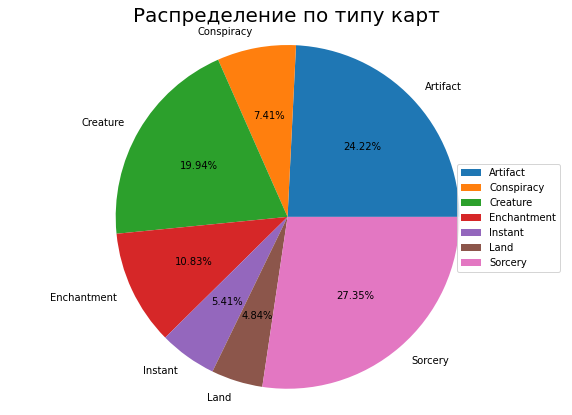

In [15]:
# сводная таблица
type_com = df_commander_ban.pivot_table(index = 'type_id', values = 'name', aggfunc = ['count'])
type_com.columns = ['count']

# диаграмма
palette_color = sns.color_palette()
fig, ax = plt.subplots(figsize=(10, 7))
plt.pie(data=type_com, x = 'count', labels = type_com.index, colors = palette_color, autopct='%.2f%%')
ax.axis('equal')
ax.legend(loc='center right')
ax.set_title('Распределение по типу карт', fontsize = 20)
plt.show()

<div class="alert alert-success"> 
Поскольку в столбце type в ряде случаев приведенные типы можно было объединить в более крупные группы, итоговый результат представлен именно с учетом укрупненных групп. Среди карт, запрещенных в формате Commander, преобладают карты типа Sorcery, на втором месте карты типа Artifact, на третьем - Creature. Минимально представлен тип - Land.

## Топ-10 карт, не являющихся землями, которые были напечатаны в наибольшем количестве сетов.

In [16]:
# дублирование столбца
df['type_id'] = df[['type']]

# выделение отдельно карт типа Земля (Land)
df.loc[df.type_id.str.contains('Land')]
df.loc[(df.type_id.str.contains('Land')), 'type_id'] = 'Land'

# создание среза карт, не являющихся землями
df_no_land = df.query('type_id != "Land"')

# сводная таблица с количеством сетов по каждой карте
set_no_land = df_no_land.pivot_table(index = ['name'], values = 'set', aggfunc = ['count'])
set_no_land.columns = ['count']

# Топ-10 карт с наибольшим количеством сетов
set_10 = set_no_land['count'].sort_values(ascending=False).head(10)
set_10

name
Counterspell            57
Swords to Plowshares    54
Disenchant              50
Giant Growth            49
Lightning Bolt          44
Sol Ring                44
Serra Angel             44
Llanowar Elves          44
Dark Ritual             43
Wrath of God            42
Name: count, dtype: int64

<div class="alert alert-success"> 
В десятку входят карты с количеством сетов от 57 до 42: Counterspell, Swords to Plowshares, Disenchant, Giant Growth, Lightning Bolt, Sol Ring, Serra Angel, Llanowar Elves, Dark Ritual, Wrath of God.

## Определение для карт, не являющихся землями, того, какая часть из них даёт ману с помощью своего эффекта. Распределение по типу маны, которую дают эти карты.

In [17]:
# выделение категории карт, в описании которых есть упоминание об их способностях давать ману (ориентируемся на слово 'add') 
df_no_land['text'] = df_no_land['text'].apply(str)
df_no_land['text'] = df_no_land['text'].apply(lambda x: x.lower())
df_no_land['add'] = df_no_land['text'].apply(lambda x: ('add ' in x))

# проверка
df_no_land['add'].value_counts()

False    56413
True      2765
Name: add, dtype: int64

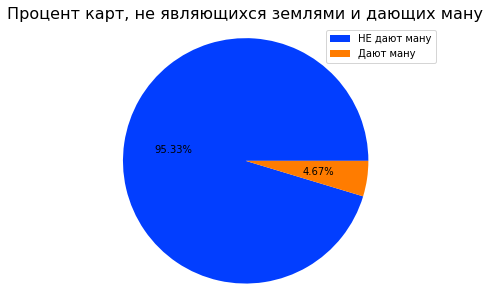

In [18]:
# сводная таблица
add_mana = df_no_land.pivot_table(index = 'add', values = 'name', aggfunc = ['count'])
add_mana.columns = ['count']

# диаграмма
palette_color = sns.color_palette('bright')
fig, ax = plt.subplots(figsize=(7, 5))
plt.pie(data=add_mana, x = 'count', colors = palette_color, autopct='%.2f%%')
ax.axis('equal')
ax.legend(loc='best')
ax.set_title('Процент карт, не являющихся землями и дающих ману', fontsize = 16)
plt.legend(bbox_to_anchor=(1, 1))
plt.legend(['НЕ дают ману', 'Дают ману'])
plt.show();

<div class="alert alert-success"> 
Для ответа на поставленный вопрос использовались данные столбца text, где было указана информация о том, какую ману может давать та или иная карта. Таким образом, в одну группу были объединены карты, у которых в описании было отмечено то, что они дают какую-либо ману. В результате таких карт оказалось 4.67%.

In [19]:
# создание среза карт, не являющихся землями и дающих ману
df_no_land_add_mana = df_no_land.query('add == True')

# категоризация карт в зависимости от того, какой тип ману они дают
def mana_add(x):
    give = x.split('add')[1]
    give = give.split('.')[0]
    if 'mana' in give:
        return ['w', 'b', 'r', 'g', 'u']
    mana_type = []
    if '{w}' in x:
        mana_type.append('w')
    if '{b}' in x:
        mana_type.append('b')
    if '{r}' in x:
        mana_type.append('r')
    if '{g}' in x:
        mana_type.append('g')
    if '{u}' in x:
        mana_type.append('u')
    if '{c}' in x:
        mana_type.append('c')
    return mana_type

# добавление информации в существующий столбец add
df_no_land_add_mana['add'] = df_no_land_add_mana['text'].apply(mana_add)
# преобразование в строковый формат
df_no_land_add_mana['add'] = df_no_land_add_mana['add'].apply(str)
# удаление ненужных символов
df_no_land_add_mana = df_no_land_add_mana.loc[df_no_land_add_mana['add'] !='[]', :]

# проверка
df_no_land_add_mana['add'].value_counts()

['w', 'b', 'r', 'g', 'u']    898
['c']                        463
['g']                        314
['r']                        203
['b']                        172
['r', 'g']                    65
['u']                         59
['w']                         52
['w', 'u']                    32
['b', 'r']                    31
['g', 'u']                    28
['b', 'u']                    26
['w', 'r']                    25
['b', 'g']                    25
['r', 'u']                    23
['w', 'g']                    21
['w', 'b']                    20
['w', 'g', 'u']               16
['u', 'c']                    15
['b', 'r', 'u']               14
['b', 'r', 'g']               10
['w', 'r', 'g']                9
['w', 'b', 'u']                7
['w', 'r', 'u']                7
['r', 'g', 'u']                6
['w', 'r', 'g', 'u']           6
['g', 'u', 'c']                5
['b', 'c']                     5
['b', 'g', 'c']                5
['r', 'u', 'c']                4
['b', 'u',

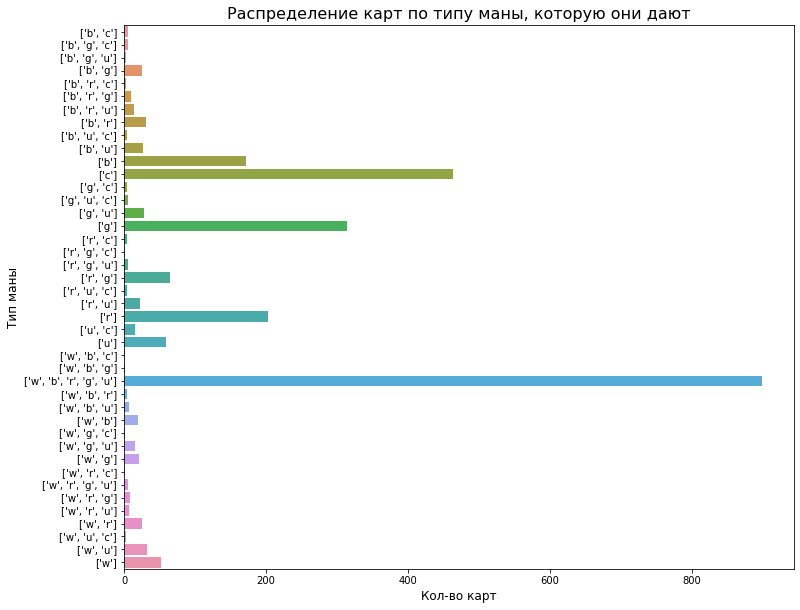

In [20]:
# сводная таблица
df_mana = df_no_land_add_mana.pivot_table(index = 'add', values = 'name', aggfunc = ['count'])
df_mana.columns = ['count']

# диаграмма
fig, ax = plt.subplots(figsize=(12, 10))
sns.barplot(data=df_mana, y = df_mana.index, x = 'count')
plt.title('Распределение карт по типу маны, которую они дают', fontsize = 16)
plt.xlabel('Кол-во карт', fontsize=12)
plt.ylabel('Тип маны', fontsize=12);

<div class="alert alert-success"> 
Для случаев, когда в описании карты было указано, что она дают ману любого цвета, изначально указан перечень возможных цветов. Буквой c обозначена мана не цветовая, а числовая. Таким образом, больше всего карт, которые могут давать ману любого цвета, на втором месте карты с числовой маной, на третьем - карты с маной зеленого цвета.